In [6]:
import time as time
import numpy as np
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_swiss_roll

%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>


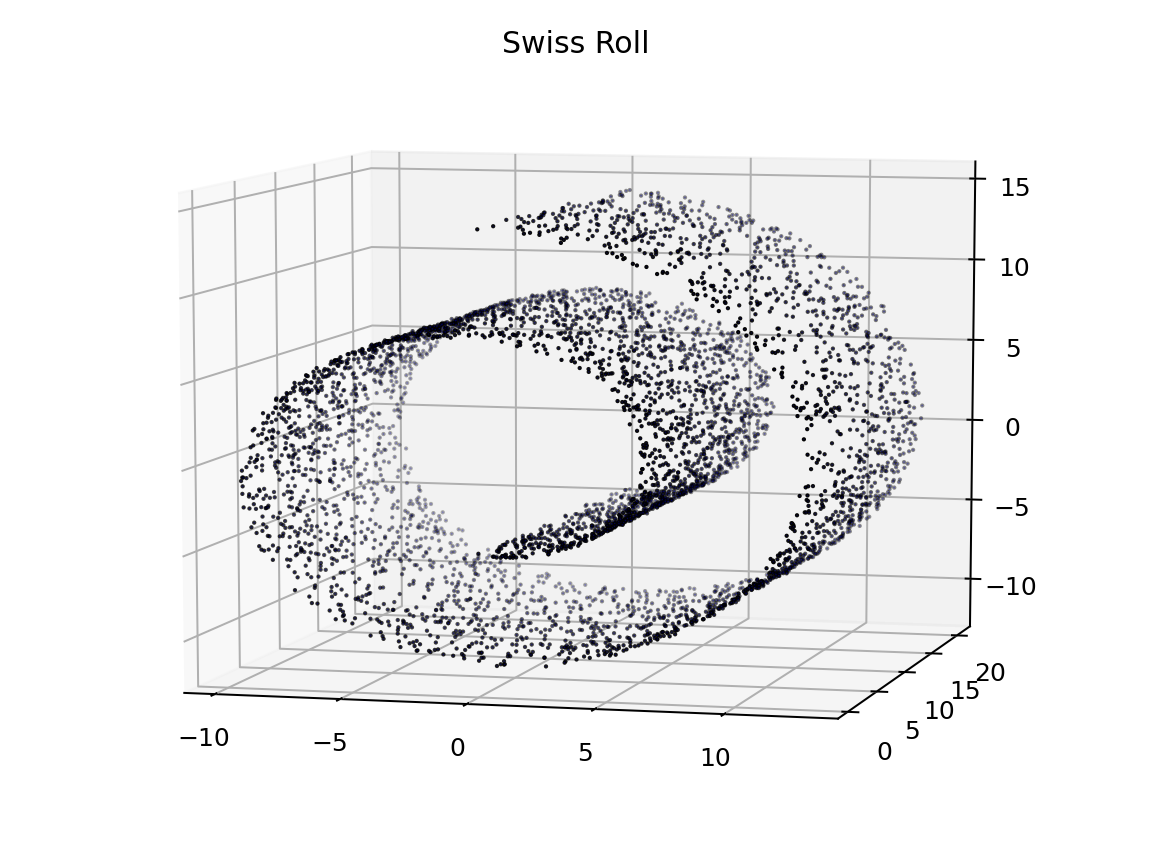

Text(0.5, 0.92, 'Swiss Roll')

In [5]:
n_samples = 5000
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise)

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], color='blue', s=.5, edgecolor='k')
ax.set_title("Swiss Roll")

In [14]:
# train bijective transformation
from agents.lsp_hierarchical_rl.model import BijectiveTransform
import torch
from torch.optim import Adam
from tqdm import tqdm

f = BijectiveTransform(3, 6, scale_net_hidden_layer_num=2, scale_net_hidden_layer_size=256, 
    translate_net_hidden_layer_num=2, translate_net_hidden_layer_size=256, condition_vector_size=0)
optim = Adam(f.parameters())


TRAIN_EPOCHS = 50001
BATCH_SIZE = 256
pbar = tqdm(range(TRAIN_EPOCHS))
for epoch in pbar:
    X, _ = make_swiss_roll(BATCH_SIZE, noise)

    ll = f.calc_log_likelihood(torch.FloatTensor(X))
    optim.zero_grad()
    (-ll).backward()
    optim.step()

    if epoch % 1000 == 0:
        print("EPOCH {} --- Log-likelihood {:.2f}".format(epoch, ll.item()))


  0%|          | 4/50001 [00:00<1:25:46,  9.72it/s]

EPOCH 0 --- Log-likelihood -1395.30


  2%|▏         | 1003/50001 [00:44<42:04, 19.41it/s] 

EPOCH 1000 --- Log-likelihood -8.25


  4%|▍         | 2002/50001 [01:34<44:08, 18.12it/s]  

EPOCH 2000 --- Log-likelihood -9.58


  6%|▌         | 3005/50001 [02:27<37:19, 20.98it/s]  

EPOCH 3000 --- Log-likelihood -7.63


  8%|▊         | 4003/50001 [03:14<34:55, 21.95it/s]  

EPOCH 4000 --- Log-likelihood -7.37


 10%|█         | 5005/50001 [03:57<33:03, 22.69it/s]

EPOCH 5000 --- Log-likelihood -7.95


 12%|█▏        | 6004/50001 [04:41<32:10, 22.79it/s]

EPOCH 6000 --- Log-likelihood -7.33


 14%|█▍        | 7003/50001 [05:25<32:45, 21.88it/s]

EPOCH 7000 --- Log-likelihood -7.12


 16%|█▌        | 8003/50001 [06:12<31:12, 22.42it/s]

EPOCH 8000 --- Log-likelihood -7.15


 18%|█▊        | 9005/50001 [06:57<30:49, 22.16it/s]

EPOCH 9000 --- Log-likelihood -7.14


 20%|██        | 10004/50001 [07:43<30:04, 22.16it/s]

EPOCH 10000 --- Log-likelihood -6.85


 22%|██▏       | 11003/50001 [08:29<31:31, 20.62it/s]

EPOCH 11000 --- Log-likelihood -7.02


 24%|██▍       | 12005/50001 [09:15<28:56, 21.88it/s]

EPOCH 12000 --- Log-likelihood -6.95


 26%|██▌       | 13003/50001 [10:01<28:24, 21.70it/s]

EPOCH 13000 --- Log-likelihood -6.73


 28%|██▊       | 14003/50001 [10:48<28:47, 20.84it/s]

EPOCH 14000 --- Log-likelihood -7.03


 30%|███       | 15003/50001 [11:36<28:24, 20.54it/s]

EPOCH 15000 --- Log-likelihood -7.50


 32%|███▏      | 16004/50001 [12:23<27:19, 20.73it/s]

EPOCH 16000 --- Log-likelihood -6.95


 34%|███▍      | 17005/50001 [13:12<27:37, 19.91it/s]

EPOCH 17000 --- Log-likelihood -7.15


 36%|███▌      | 18004/50001 [14:01<26:46, 19.92it/s]

EPOCH 18000 --- Log-likelihood -6.72


 38%|███▊      | 19004/50001 [50:57<444:31:13, 51.63s/it]  

EPOCH 19000 --- Log-likelihood -6.60


 40%|████      | 20003/50001 [1:26:23<24:06, 20.74it/s]      

EPOCH 20000 --- Log-likelihood -6.52


 42%|████▏     | 21005/50001 [1:57:12<23:05, 20.93it/s]      

EPOCH 21000 --- Log-likelihood -6.54


 44%|████▍     | 22005/50001 [1:58:01<22:31, 20.71it/s]

EPOCH 22000 --- Log-likelihood -7.41


 45%|████▍     | 22331/50001 [1:58:17<2:26:34,  3.15it/s]


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


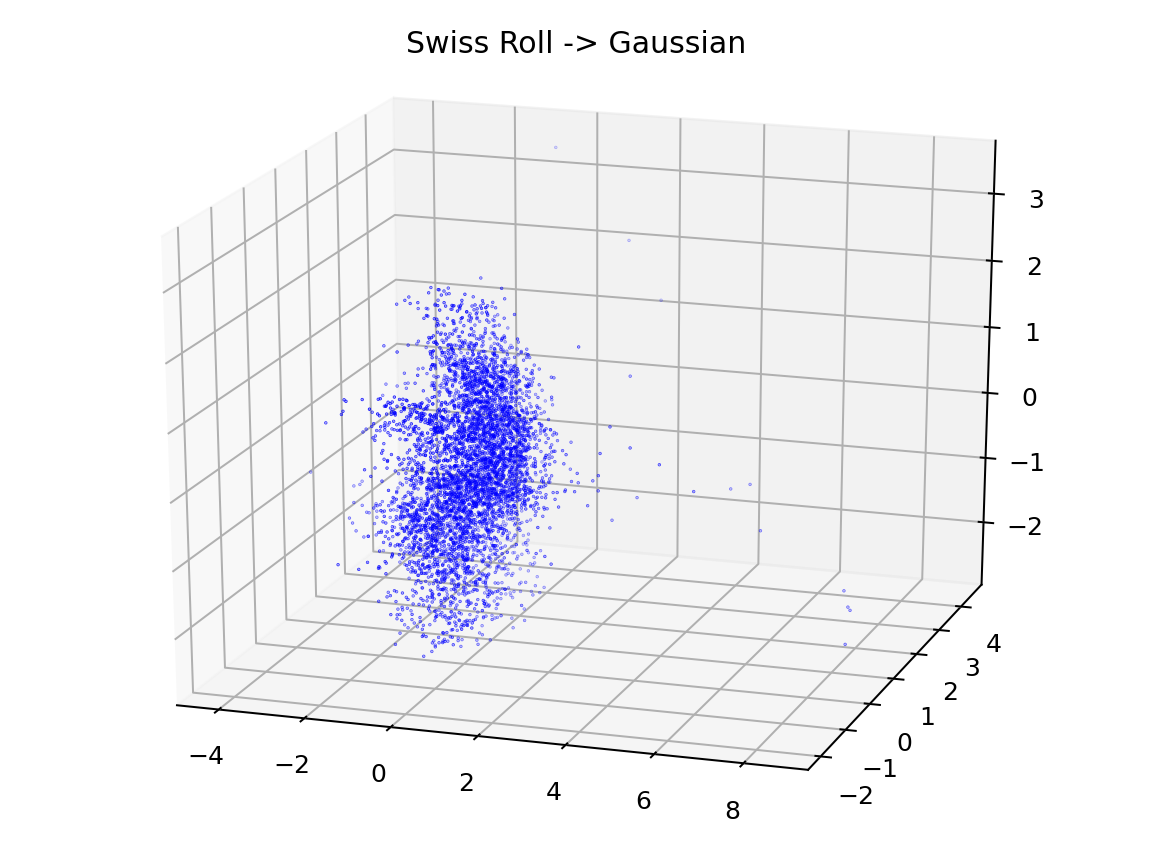

<IPython.core.display.Javascript object>


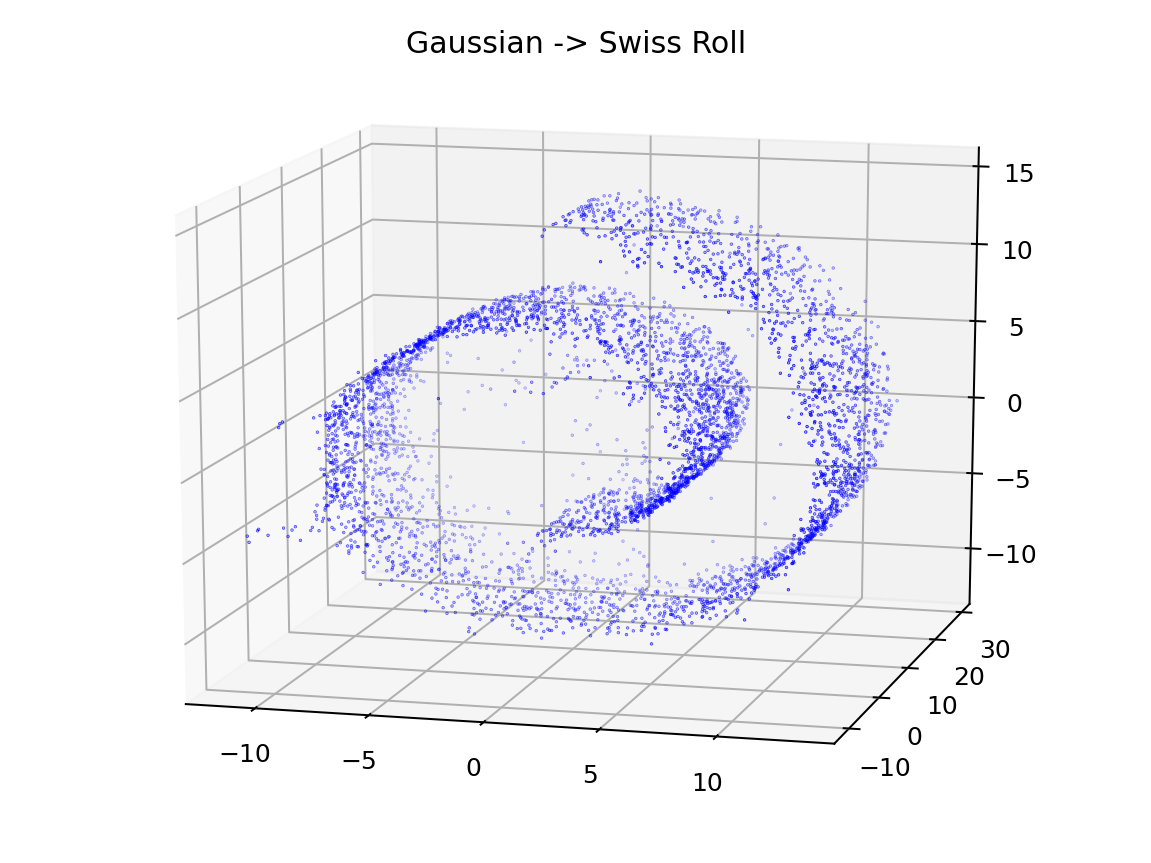

Text(0.5, 0.92, 'Gaussian -> Swiss Roll')

In [17]:
DATASIZE = 5000
noise = 0.05

X, _ = make_swiss_roll(DATASIZE, noise)
Z, _ = f.infer(torch.FloatTensor(X))
Z = Z.detach().numpy()

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
# ax.scatter(X[:, 0], X[:, 1], X[:, 2], color='black', s=.1)
ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], color='blue', s=.1)
ax.set_title("Swiss Roll -> Gaussian")


m_norm = torch.distributions.MultivariateNormal(torch.zeros(3), torch.eye(3))
Z_ = m_norm.sample((DATASIZE, ))
X_, _ = f.generate(torch.FloatTensor(Z_))
X_ = X_.detach().numpy()

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
# ax.scatter(Z_[:, 0], Z_[:, 1], Z_[:, 2], color='black', s=.1)
ax.scatter(X_[:, 0], X_[:, 1], X_[:, 2], color='blue', s=.1)
ax.set_title("Gaussian -> Swiss Roll")
